In [1]:
import h5py

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

# From npy

In [2]:
def plot_from_npy(npy_file, save_path=None):
    data = np.load(npy_file)
    fig, ax = plt.subplots(1,1, figsize=(5, 4))

    cmap = mpl.cm.get_cmap("jet").copy()
    cmap.set_under(color='white')

    imag = ax.imshow(data.sum(axis=0)[:,:,0].transpose() / data.shape[0], extent=[-1.0, 1.0, -1.0, 1.0], norm=colors.SymLogNorm(linthresh=0.0001, linscale=0.1, vmin=1e-3, vmax=1e3), cmap=cmap, origin='lower')
    cbar = plt.colorbar(imag, ax=ax, shrink=0.9)

    ax.set_xlabel(r'$\eta^\prime$') 
    ax.set_ylabel(r'$\phi^\prime$')

    cbar.set_label(r'$ p_{\mathrm{T}}$ [GeV]', rotation=90, labelpad=5)

    if save_path:
        plt.savefig(save_path, dpi=300, facecolor='White', bbox_inches='tight')

    plt.show()

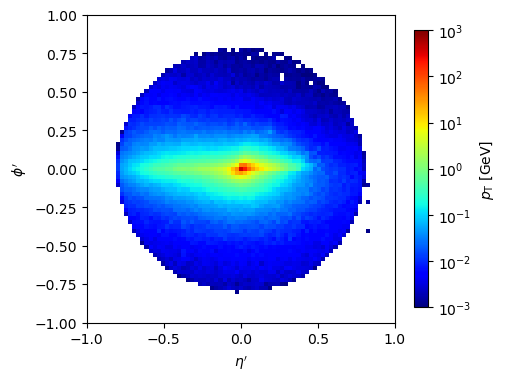

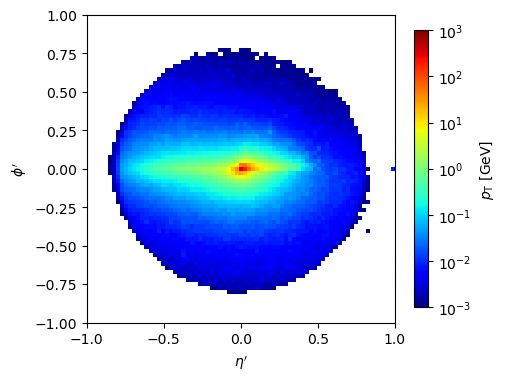

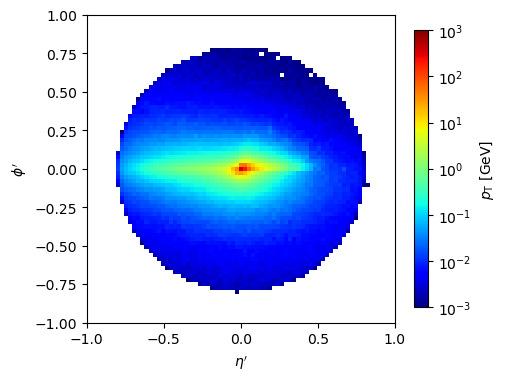

In [3]:
npy_path = './HVmodel/data/new/mix_sample_1.0-data.npy'
plot_from_npy(npy_path, 
              save_path='../figures/HVmodel_jet_image_average_original.pdf'
              )

npy_path = './HVmodel/data/new/mix_sample_1.0_aug_1-data.npy'
plot_from_npy(npy_path, 
              save_path='../figures/HVmodel_jet_image_average_aug_1.pdf'
              )

npy_path = './HVmodel/data/new/mix_sample_1.0_x2-data.npy'
plot_from_npy(npy_path, 
              save_path='../figures/HVmodel_jet_image_average_x2.pdf'
              )

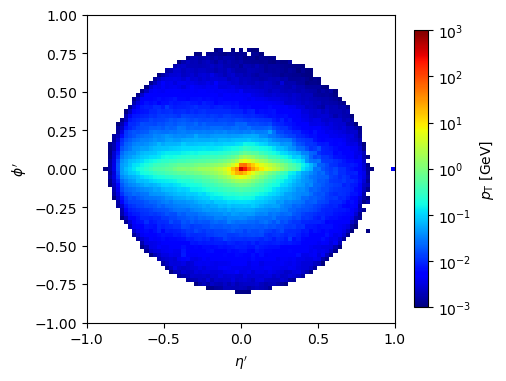

In [4]:
npy_path = './HVmodel/data/DA/mix_sample_10.0_aug_3-data.npy'
data_aug_3 = plot_from_npy(npy_path, save_path='../figures/HVmodel_jet_image_average_aug_3.pdf')

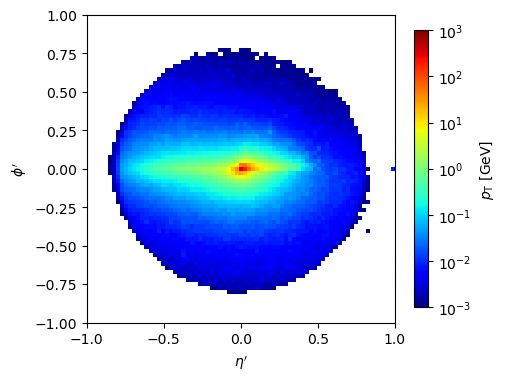

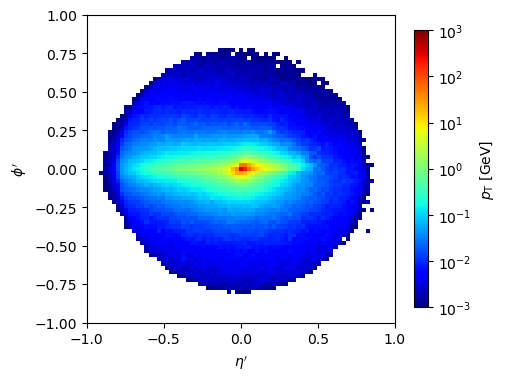

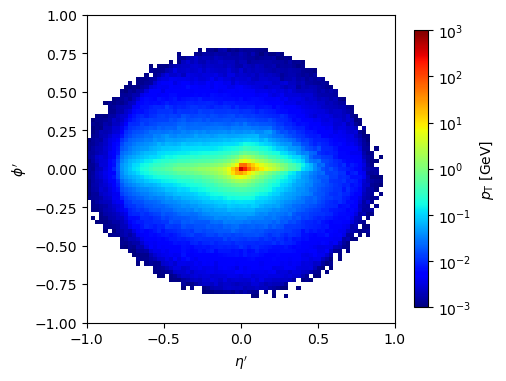

In [3]:
npy_path = './HVmodel/data/new/mix_sample_1.0_aug_1-data.npy'
plot_from_npy(npy_path, 
              save_path='../figures/HVmodel_jet_image_average_aug_1.pdf'
              )

npy_path = './HVmodel/data/smearing_scale_02/mix_sample_1.0_aug_1-data.npy'
plot_from_npy(npy_path, 
              save_path='../figures/HVmodel_jet_image_average_aug_1_std_02.pdf'
              )

npy_path = './HVmodel/data/smearing_scale_05/mix_sample_1.0_aug_1-data.npy'
plot_from_npy(npy_path, 
              save_path='../figures/HVmodel_jet_image_average_aug_1_std_05.pdf'
              )

In [6]:
pT = [[0,0],[0,0]]
N = [[0,0],[0,0]]
with open('./HVmodel/data/background.npy', 'rb') as f:
    data = np.load(f, allow_pickle=True)
    try:
        while True:
            mjj = data[0]
            if mjj > 4700 and mjj < 5500:
                pT[0][0] += data[1][0]
                pT[1][0] += data[1][1]
                N[0][0] += 1
                N[1][0] += 1
            else:
                pT[0][1] += data[1][0]
                pT[1][1] += data[1][1]
                N[0][1] += 1
                N[1][1] += 1
            data = np.load(f, allow_pickle=True)
    except:
        pass

[[19710 30289]
 [19710 30289]]


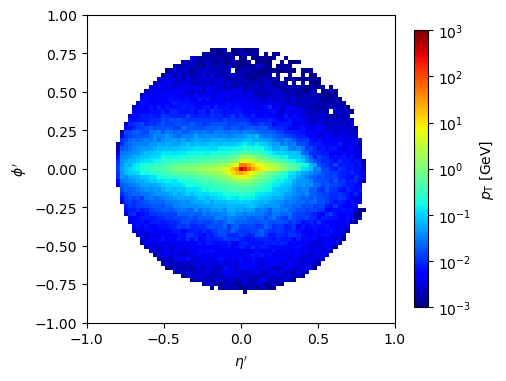

In [7]:
pT = np.array(pT)
N = np.array(N)
print(N)

fig, ax = plt.subplots(1,1, figsize=(5, 4))

cmap = mpl.cm.get_cmap("jet").copy()
cmap.set_under(color='white')

imag = ax.imshow(pT[0,0].transpose() / N[0,0], extent=[-1.0, 1.0, -1.0, 1.0], norm=colors.SymLogNorm(linthresh=0.0001, linscale=0.1, vmin=1e-3, vmax=1e3), cmap=cmap, origin='lower')
cbar = plt.colorbar(imag, ax=ax, shrink=0.9)

ax.set_xlabel(r'$\eta^\prime$') 
ax.set_ylabel(r'$\phi^\prime$')

cbar.set_label(r'$ p_{\mathrm{T}}$ [GeV]', rotation=90, labelpad=5)

plt.savefig('../figures/HVmodel_background_jet_image_average.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

In [8]:
# pT = [0,0]
# N = [0,0]
# with open('./HVmodel/data/signal.npy', 'rb') as f:
#     data = np.load(f, allow_pickle=True)
#     mjj = data[0]
#     if mjj > 4700 and mjj < 5500:
#         pT[0] += data[1][0]
#         pT[1] += data[1][1]
#         N[0] += 1
#         N[1] += 1


In [9]:
# pT = np.array(pT)
# N = np.array(N)

# fig, ax = plt.subplots(1,1, figsize=(5, 4))

# cmap = mpl.cm.get_cmap("jet").copy()
# cmap.set_under(color='white')

# imag = ax.imshow(pT[0].transpose() / N[0], extent=[-1.0, 1.0, -1.0, 1.0], norm=colors.SymLogNorm(linthresh=0.0001, linscale=0.1, vmin=1e-3, vmax=1e3), cmap=cmap, origin='lower')
# cbar = plt.colorbar(imag, ax=ax, shrink=0.9)

# ax.set_xlabel(r'$\eta^\prime$') 
# ax.set_ylabel(r'$\phi^\prime$')

# cbar.set_label(r'$ p_{\mathrm{T}}$ [GeV]', rotation=90, labelpad=5)

# plt.savefig('../figures/HVmodel_signal_jet_image_one_event.pdf', dpi=300, facecolor='White', bbox_inches='tight')
# plt.show()

In [10]:
pT = [0,0]
N = [0,0]
with open('./HVmodel/data/background.npy', 'rb') as f:
    data = np.load(f, allow_pickle=True)
    mjj = data[0]
    if mjj > 4700 and mjj < 5500:
        pT[0] += data[1][0]
        pT[1] += data[1][1]
        N[0] += 1
        N[1] += 1


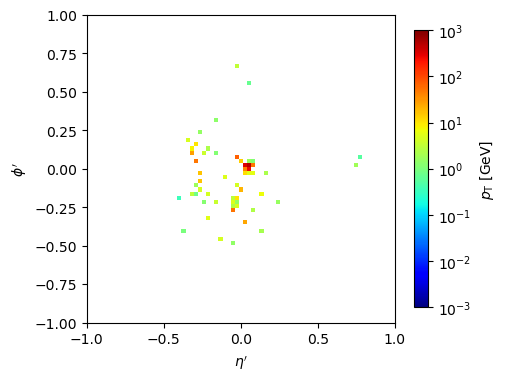

In [11]:
pT = np.array(pT)
N = np.array(N)

fig, ax = plt.subplots(1,1, figsize=(5, 4))

cmap = mpl.cm.get_cmap("jet").copy()
cmap.set_under(color='white')

imag = ax.imshow(pT[0].transpose() / N[0], extent=[-1.0, 1.0, -1.0, 1.0], norm=colors.SymLogNorm(linthresh=0.0001, linscale=0.1, vmin=1e-3, vmax=1e3), cmap=cmap, origin='lower')
cbar = plt.colorbar(imag, ax=ax, shrink=0.9)

ax.set_xlabel(r'$\eta^\prime$') 
ax.set_ylabel(r'$\phi^\prime$')

cbar.set_label(r'$ p_{\mathrm{T}}$ [GeV]', rotation=90, labelpad=5)

plt.savefig('../figures/HVmodel_background_jet_image_one_event.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

# From h5

In [4]:
def std_phi(phi):
    # return the phi in range [-pi, pi]
    while np.any(phi > np.pi):
        phi[phi > np.pi] -= 2 * np.pi
    while np.any(phi < -np.pi):
        phi[phi < -np.pi] += 2 * np.pi
    return phi

def quadrant_max_vectorized(eta, phi, pt):
        # 建立條件列表
        conditions = [
            (eta > 0) & (phi > 0),
            (eta > 0) & (phi < 0),
            (eta < 0) & (phi < 0),
            (eta < 0) & (phi > 0)
        ]

        # 建立輸出陣列
        pt_quadrants = np.zeros((eta.shape[0], 4))

        # 對每個象限進行操作
        for i, condition in enumerate(conditions):
            pt_quadrants[:, i] = np.sum(np.where(condition, pt, 0), axis=1)

        return pt_quadrants

def preprocess(pts, etas, phis):
    
    variances = np.var(phis, axis=1)
    phis = np.where((variances > 0.5)[:,None], phis + np.pi, phis)
    phis = std_phi(phis)

    # compute pt weighted center
    eta_central = ((pts * etas).sum(axis=1) / pts.sum(axis=1))[:,None]
    phi_central = ((pts * phis).sum(axis=1) / pts.sum(axis=1))[:,None]

    # compute rotation angle
    s_etaeta = (pts * (etas - eta_central)**2).sum(axis=1) / pts.sum(axis=1)
    s_phiphi = (pts * (phis - phi_central)**2).sum(axis=1) / pts.sum(axis=1)
    s_etaphi = (pts * (etas - eta_central) * (phis - phi_central)).sum(axis=1) / pts.sum(axis=1)

    angle = -np.arctan((-s_etaeta + s_phiphi + np.sqrt((s_etaeta - s_phiphi)**2 + 4. * s_etaphi**2))/(2. * s_etaphi))[:,None]

    eta_shift, phi_shift = etas - eta_central, std_phi(phis - phi_central)
    eta_rotat, phi_rotat = eta_shift * np.cos(angle) - phi_shift * np.sin(angle), phi_shift * np.cos(angle) + eta_shift * np.sin(angle)

    pt_quadrants = quadrant_max_vectorized(eta_rotat, phi_rotat, pts)

    phi_flip = np.where((np.argmax(pt_quadrants, axis=1) == 1) | (np.argmax(pt_quadrants, axis=1) == 2), -1., 1.)[:,None]
    eta_flip = np.where((np.argmax(pt_quadrants, axis=1) == 2) | (np.argmax(pt_quadrants, axis=1) == 3), -1., 1.)[:,None]

    eta_news = eta_rotat * eta_flip
    phi_news = phi_rotat * phi_flip

    return pts, eta_news, phi_news

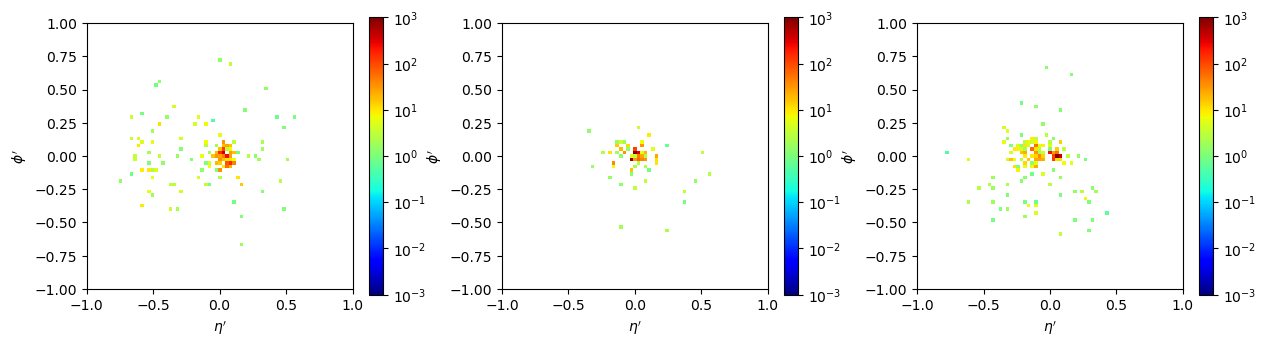

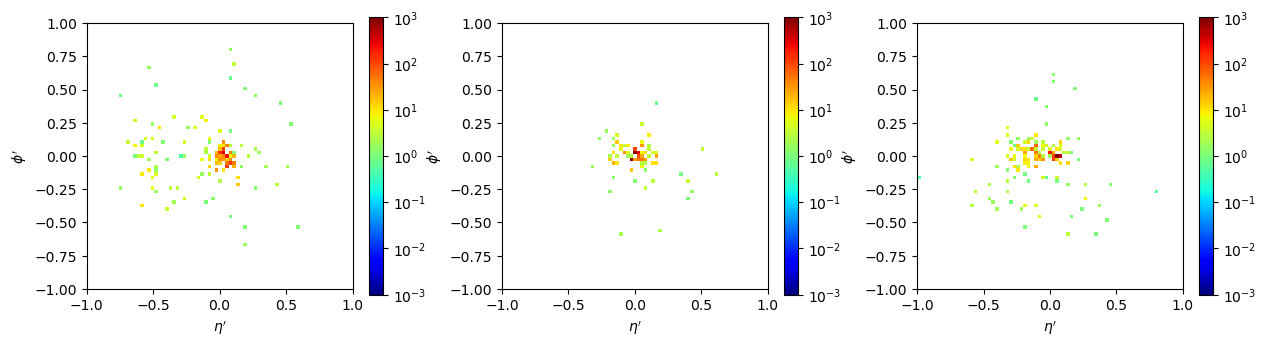

In [10]:
h5_path = './HVmodel/data/new/mix_sample_1.0_aug_1.h5'

with h5py.File(h5_path, 'r') as f:
    original_size = f['J1/pt'].shape[0] // 2
    events = np.array([0, 23, 120])
    n = len(events)

    events = np.concatenate((events, events + original_size))
    pt1 = f['J1/pt'][events]
    eta1 = f['J1/eta'][events]
    phi1 = f['J1/phi'][events]

pt1, eta1, phi1 = preprocess(pt1, eta1, phi1)


fig, ax = plt.subplots(1,n, figsize=(5*n, 4))

cmap = mpl.cm.get_cmap("jet").copy()
cmap.set_under(color='white')

for i in range(n):
    hist, _, _ = np.histogram2d(eta1[i], phi1[i], bins=[75, 75], range=[[-1.0, 1.0], [-1.0, 1.0]], weights=pt1[i])
    imag = ax[i].imshow(hist.transpose(), extent=[-1.0, 1.0, -1.0, 1.0], norm=colors.SymLogNorm(linthresh=0.0001, linscale=0.1, vmin=1e-3, vmax=1e3), cmap=cmap, origin='lower')
    ax[i].set_xlabel(r'$\eta^\prime$')
    ax[i].set_ylabel(r'$\phi^\prime$')
    cbar = plt.colorbar(imag, ax=ax[i], shrink=0.9)
# cbar.set_label(r'$ p_{\mathrm{T}}$ [GeV]', rotation=90, labelpad=5)
    
# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
plt.savefig('../figures/HVmodel_jet_image_one_event_original.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1,n, figsize=(5*n, 4))

cmap = mpl.cm.get_cmap("jet").copy()
cmap.set_under(color='white')

for i in range(n):
    hist, _, _ = np.histogram2d(eta1[n+i], phi1[n+i], bins=[75, 75], range=[[-1.0, 1.0], [-1.0, 1.0]], weights=pt1[n+i])
    imag = ax[i].imshow(hist.transpose(), extent=[-1.0, 1.0, -1.0, 1.0], norm=colors.SymLogNorm(linthresh=0.0001, linscale=0.1, vmin=1e-3, vmax=1e3), cmap=cmap, origin='lower')
    ax[i].set_xlabel(r'$\eta^\prime$')
    ax[i].set_ylabel(r'$\phi^\prime$')
    cbar = plt.colorbar(imag, ax=ax[i], shrink=0.9)
# cbar.set_label(r'$ p_{\mathrm{T}}$ [GeV]', rotation=90, labelpad=5)

# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
plt.savefig('../figures/HVmodel_jet_image_one_event_eta_phi_smearing.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Change smearing scale 

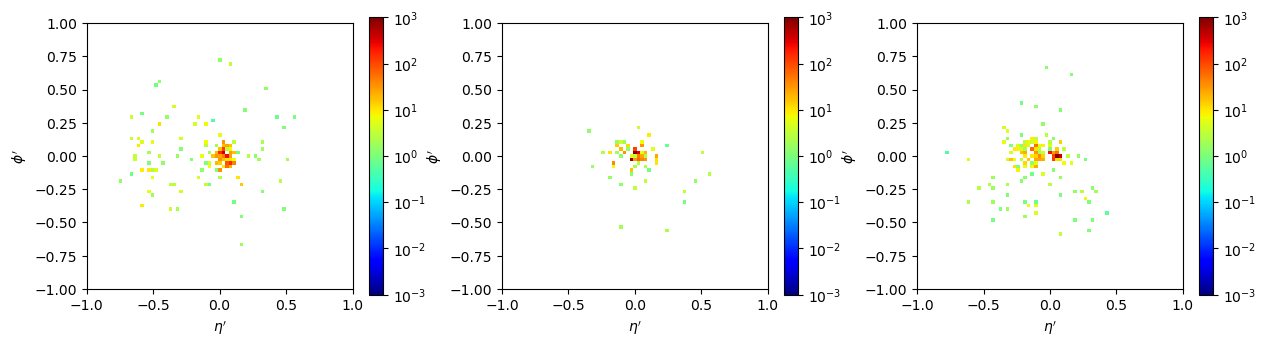

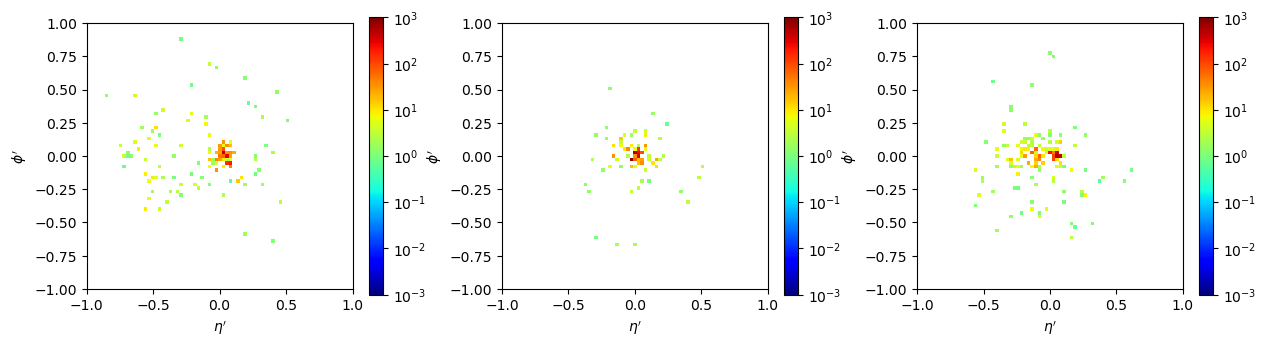

In [5]:
h5_path = './HVmodel/data/smearing_scale_02/mix_sample_1.0_aug_1.h5'

with h5py.File(h5_path, 'r') as f:
    original_size = f['J1/pt'].shape[0] // 2
    events = np.array([0, 23, 120])
    n = len(events)

    events = np.concatenate((events, events + original_size))
    pt1 = f['J1/pt'][events]
    eta1 = f['J1/eta'][events]
    phi1 = f['J1/phi'][events]

pt1, eta1, phi1 = preprocess(pt1, eta1, phi1)


fig, ax = plt.subplots(1,n, figsize=(5*n, 4))

cmap = mpl.cm.get_cmap("jet").copy()
cmap.set_under(color='white')

for i in range(n):
    hist, _, _ = np.histogram2d(eta1[i], phi1[i], bins=[75, 75], range=[[-1.0, 1.0], [-1.0, 1.0]], weights=pt1[i])
    imag = ax[i].imshow(hist.transpose(), extent=[-1.0, 1.0, -1.0, 1.0], norm=colors.SymLogNorm(linthresh=0.0001, linscale=0.1, vmin=1e-3, vmax=1e3), cmap=cmap, origin='lower')
    ax[i].set_xlabel(r'$\eta^\prime$')
    ax[i].set_ylabel(r'$\phi^\prime$')
    cbar = plt.colorbar(imag, ax=ax[i], shrink=0.9)
# cbar.set_label(r'$ p_{\mathrm{T}}$ [GeV]', rotation=90, labelpad=5)
    
# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
# plt.savefig('../figures/HVmodel_jet_image_one_event_original.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1,n, figsize=(5*n, 4))

cmap = mpl.cm.get_cmap("jet").copy()
cmap.set_under(color='white')

for i in range(n):
    hist, _, _ = np.histogram2d(eta1[n+i], phi1[n+i], bins=[75, 75], range=[[-1.0, 1.0], [-1.0, 1.0]], weights=pt1[n+i])
    imag = ax[i].imshow(hist.transpose(), extent=[-1.0, 1.0, -1.0, 1.0], norm=colors.SymLogNorm(linthresh=0.0001, linscale=0.1, vmin=1e-3, vmax=1e3), cmap=cmap, origin='lower')
    ax[i].set_xlabel(r'$\eta^\prime$')
    ax[i].set_ylabel(r'$\phi^\prime$')
    cbar = plt.colorbar(imag, ax=ax[i], shrink=0.9)
# cbar.set_label(r'$ p_{\mathrm{T}}$ [GeV]', rotation=90, labelpad=5)

# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
plt.savefig('../figures/HVmodel_jet_image_one_event_eta_phi_smearing_std_02.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

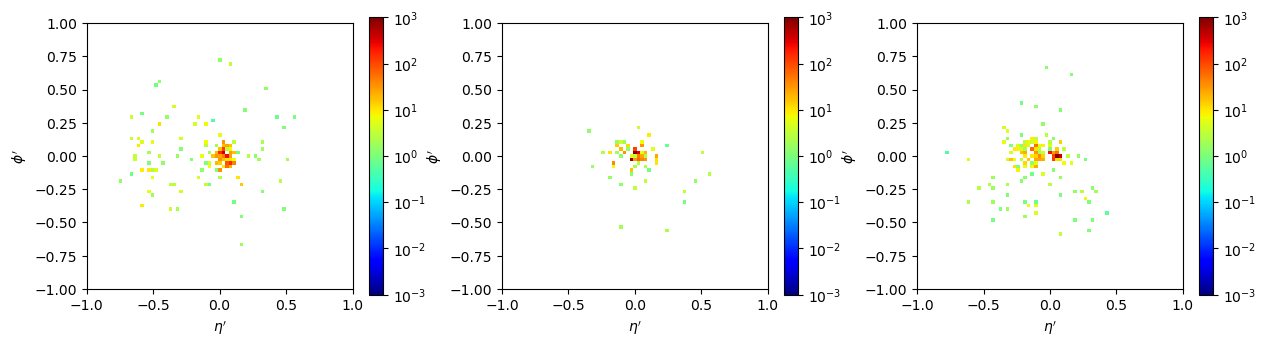

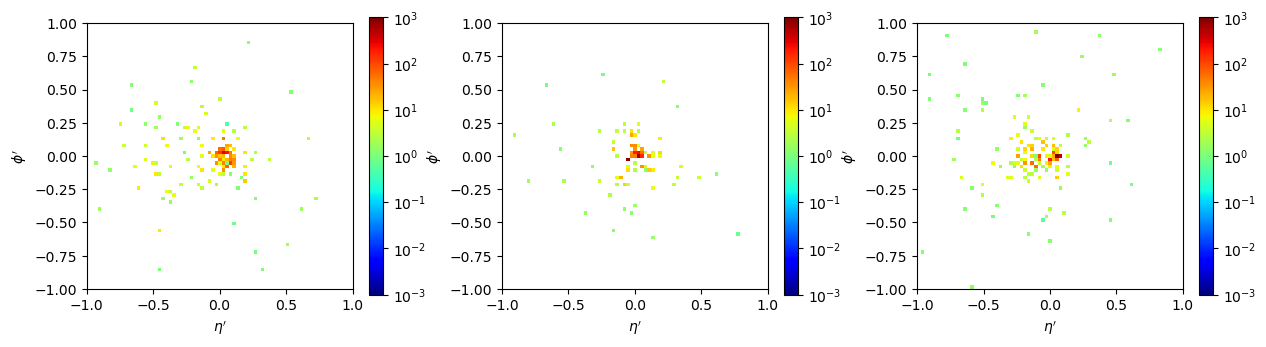

In [6]:
h5_path = './HVmodel/data/smearing_scale_05/mix_sample_1.0_aug_1.h5'

with h5py.File(h5_path, 'r') as f:
    original_size = f['J1/pt'].shape[0] // 2
    events = np.array([0, 23, 120])
    n = len(events)

    events = np.concatenate((events, events + original_size))
    pt1 = f['J1/pt'][events]
    eta1 = f['J1/eta'][events]
    phi1 = f['J1/phi'][events]

pt1, eta1, phi1 = preprocess(pt1, eta1, phi1)


fig, ax = plt.subplots(1,n, figsize=(5*n, 4))

cmap = mpl.cm.get_cmap("jet").copy()
cmap.set_under(color='white')

for i in range(n):
    hist, _, _ = np.histogram2d(eta1[i], phi1[i], bins=[75, 75], range=[[-1.0, 1.0], [-1.0, 1.0]], weights=pt1[i])
    imag = ax[i].imshow(hist.transpose(), extent=[-1.0, 1.0, -1.0, 1.0], norm=colors.SymLogNorm(linthresh=0.0001, linscale=0.1, vmin=1e-3, vmax=1e3), cmap=cmap, origin='lower')
    ax[i].set_xlabel(r'$\eta^\prime$')
    ax[i].set_ylabel(r'$\phi^\prime$')
    cbar = plt.colorbar(imag, ax=ax[i], shrink=0.9)
# cbar.set_label(r'$ p_{\mathrm{T}}$ [GeV]', rotation=90, labelpad=5)
    
# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
# plt.savefig('../figures/HVmodel_jet_image_one_event_original.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1,n, figsize=(5*n, 4))

cmap = mpl.cm.get_cmap("jet").copy()
cmap.set_under(color='white')

for i in range(n):
    hist, _, _ = np.histogram2d(eta1[n+i], phi1[n+i], bins=[75, 75], range=[[-1.0, 1.0], [-1.0, 1.0]], weights=pt1[n+i])
    imag = ax[i].imshow(hist.transpose(), extent=[-1.0, 1.0, -1.0, 1.0], norm=colors.SymLogNorm(linthresh=0.0001, linscale=0.1, vmin=1e-3, vmax=1e3), cmap=cmap, origin='lower')
    ax[i].set_xlabel(r'$\eta^\prime$')
    ax[i].set_ylabel(r'$\phi^\prime$')
    cbar = plt.colorbar(imag, ax=ax[i], shrink=0.9)
# cbar.set_label(r'$ p_{\mathrm{T}}$ [GeV]', rotation=90, labelpad=5)

# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
plt.savefig('../figures/HVmodel_jet_image_one_event_eta_phi_smearing_std_05.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()